In [99]:
%store -r full
%store -r daily_w
%store -r hr_w
%store -r random_sample

In [100]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization

# Models for daily data set

In [101]:
daily_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Casual                          1095 non-null   int64         
 1   Date                            1095 non-null   datetime64[ns]
 2   Member                          1095 non-null   int64         
 3   Total_rides                     1095 non-null   int64         
 4   apparent_temperature_mean (°C)  1095 non-null   float64       
 5   temperature_2m_mean (°C)        1095 non-null   float64       
 6   weathercode (wmo code)          1095 non-null   int64         
 7   windspeed_10m_max (km/h)        1095 non-null   float64       
 8   holiday_status                  1095 non-null   object        
 9   season                          1095 non-null   object        
 10  day_of_week                     1095 non-null   object        
dtypes: d

Multiple Lineral Regression

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression  # Add this import

# Check if there are any missing values
print(daily_w.isnull().sum())

# Define the multivariate features and the target
multivariate = daily_w.drop(['Total_rides', 'Date', 'holiday_status', 'season', 'Member', 'Casual', 'day_of_week'], axis=1)
total_rides = daily_w["Total_rides"]

print(multivariate.shape)  # Check the shape of the feature set

# Split the data into training and test sets
multivariate_01_train, multivariate_01_test, total_rides_train, total_rides_test = train_test_split(multivariate, total_rides, test_size=0.2, random_state=10)

# Check for shape consistency
print(multivariate_01_train.shape, total_rides_train.shape)

# Scale the data
scaler = StandardScaler()
multivariate_01_train_scaled = scaler.fit_transform(multivariate_01_train)
multivariate_01_test_scaled = scaler.transform(multivariate_01_test)

# Fit the linear regression model
reg_multi_01 = LinearRegression()
reg_multi_01.fit(multivariate_01_train_scaled, total_rides_train)

# Optionally, check model performance
train_score = reg_multi_01.score(multivariate_01_train_scaled, total_rides_train)
test_score = reg_multi_01.score(multivariate_01_test_scaled, total_rides_test)
print("Training accuracy:", train_score)
print("Test accuracy:", test_score)

Casual                            0
Date                              0
Member                            0
Total_rides                       0
apparent_temperature_mean (°C)    0
temperature_2m_mean (°C)          0
weathercode (wmo code)            0
windspeed_10m_max (km/h)          0
holiday_status                    0
season                            0
day_of_week                       0
dtype: int64
(1095, 4)
(876, 4) (876,)
Training accuracy: 0.5713435711902664
Test accuracy: 0.5878788077200219


In [103]:
# Linear Mulitivariant regression is has pretty low accurancy (>60 %)

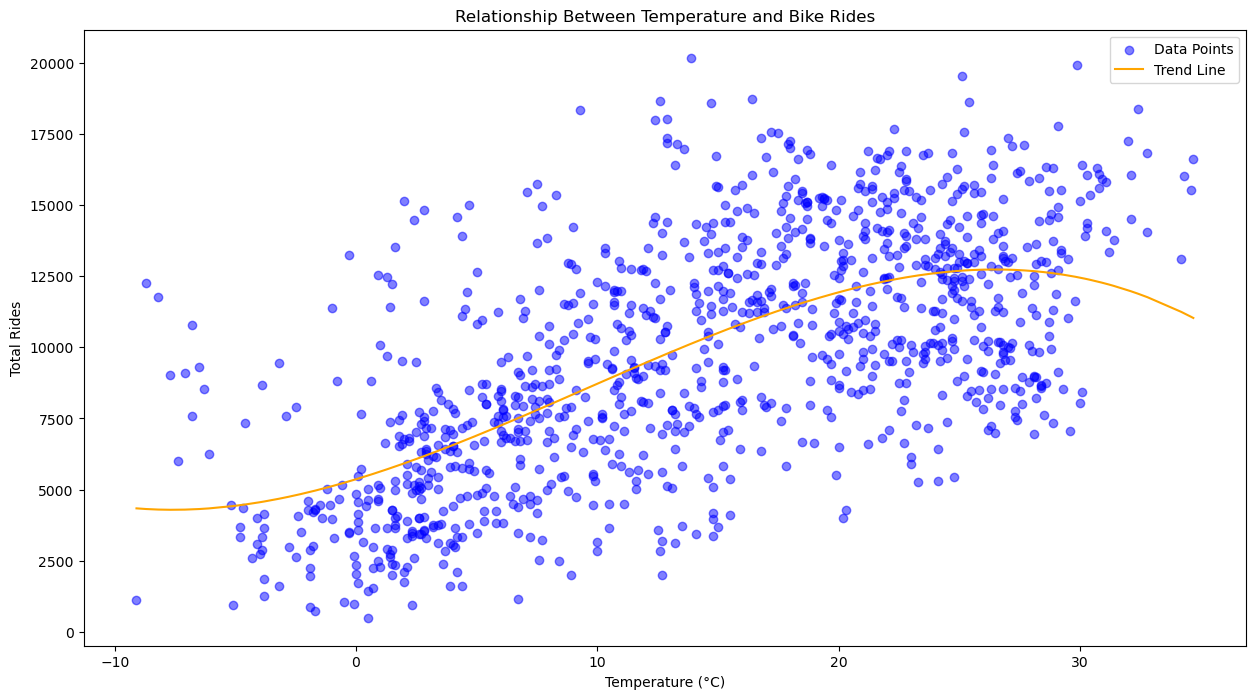

In [104]:
# Fitting polynomial regression 

# Assuming 'daily_w' is your DataFrame containing 'temperature_2m_mean (°C)' and 'Total_rides'
plt.figure(figsize=(15,8))

temperatures = daily_w['temperature_2m_mean (°C)']
total_rides = daily_w['Total_rides']

# Fit a polynomial (linear fit) between temperature and total rides
coefficients = np.polyfit(temperatures, total_rides, 3)

# Generate the polynomial function
poly_eq = np.poly1d(coefficients)

# Generate x-values (unique temperature values) and corresponding y-values (predicted total rides)
x_vals = np.unique(temperatures)
y_vals = poly_eq(x_vals)

# Plot the data and the trend line
plt.scatter(temperatures, total_rides, label='Data Points', color='blue', alpha=0.5)
plt.plot(x_vals, y_vals, color='orange', label='Trend Line')

# Adding labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Rides')
plt.title('Relationship Between Temperature and Bike Rides')
plt.legend()

# Show the plot
plt.show()


In [105]:
# Linear regression modelling

In [106]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

x = daily_w.drop(['Total_rides', 'Date', 'holiday_status', 'season', 'Member', 'Casual', 'apparent_temperature_mean (°C)','day_of_week'], axis=1)
y = daily_w['Total_rides']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both train and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Fit the model using the scaled training data
reg_area = LinearRegression()
reg_area.fit(x_train_scaled, y_train)

y_pred = reg_area.predict(x_test_scaled)  # Predict Linear Model

# Evaluate the model on the scaled test data
reg_area_score = reg_area.score(x_test_scaled, y_test)
print("The accuracy of the ML model based on temperature is:", reg_area_score)

The accuracy of the ML model based on temperature is: 0.5433174784655964


In [108]:
from sklearn.metrics import mean_squared_error,r2_score
print("R2 Score: " +"{:.3}".format(r2_score(y_test, y_pred)));
print("MSE: " +"{:.3}".format(mean_squared_error(y_test, y_pred)))

R2 Score: 0.543
MSE: 8.47e+06


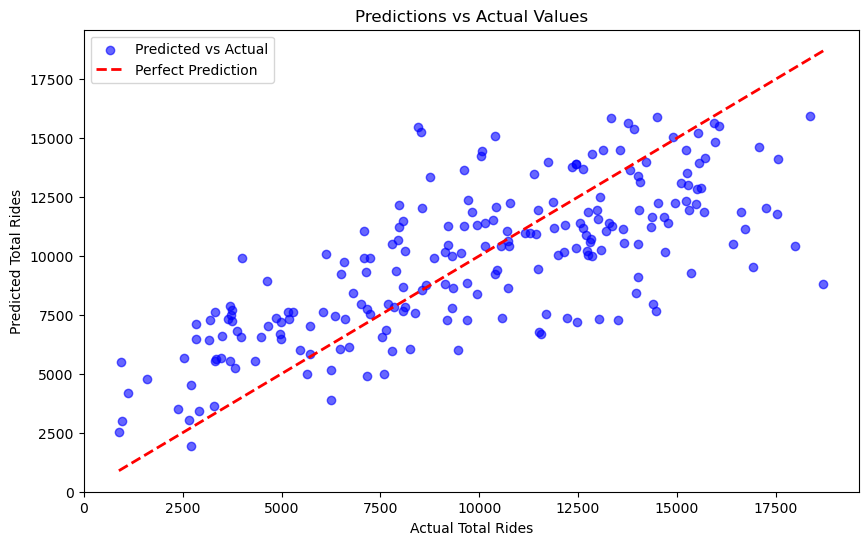

In [109]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')

# Plot the line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Total Rides')
plt.ylabel('Predicted Total Rides')
plt.title('Predictions vs Actual Values')
plt.legend()

# Show the plot
plt.show()

In [110]:
## Multivariate linear regression

multivariate = daily_w.drop(['Total_rides', 'Date', 'holiday_status', 'season', 'Member', 'Casual', 'day_of_week', 'weathercode (wmo code)'], axis=1)
total_rides = daily_w['Total_rides'] 

# Splitting data into train and test with random state 10
multivariate_train, multivariate_test, total_rides_train, total_rides_test = train_test_split(multivariate, total_rides, test_size=0.2, random_state=10)
# Scaling data
multivariate_train_scaled = scaler.fit_transform(multivariate_train)
multivariate_test_scaled = scaler.transform(multivariate_test)

print(multivariate_train_scaled.shape) 
print(multivariate_test_scaled.shape) 

(876, 3)
(219, 3)


In [111]:
reg_multi = LinearRegression()
reg_multi.fit(multivariate_train_scaled, total_rides_train)

LinearRegression()

In [112]:
print(reg_multi.score(multivariate_test_scaled, total_rides_test))
# the model is >60% accurate

0.5659218367068187


In [113]:
# Sample input for all features: [windspeed, weathercode, apparent temperature, humidity]
predictions = [10, 15, 5]  # given values by me to predict the outcome

# Formating (2D array) for prediction
predictions = np.array(predictions).reshape(1, -1)

# Scale the input features using the previously fitted scaler
predictions_scaled = scaler.transform(predictions)

# Make the prediction
pred = reg_multi.predict(predictions_scaled)

# Output the results
print(f"windspeed: {predictions[0][0]}"
      f"\napparent temperature: {predictions[0][1]}"
      f"\nhumidity: {predictions[0][2]}"  # Adjust this based on the actual feature
      f"\n\nPredicted number of rides: {pred[0]}")


windspeed: 10
apparent temperature: 15
humidity: 5

Predicted number of rides: 16618.566687344413


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [114]:
reg_multi.score(multivariate_train_scaled, total_rides_train)
# R2 value <60% which is not great

0.5465916647596927

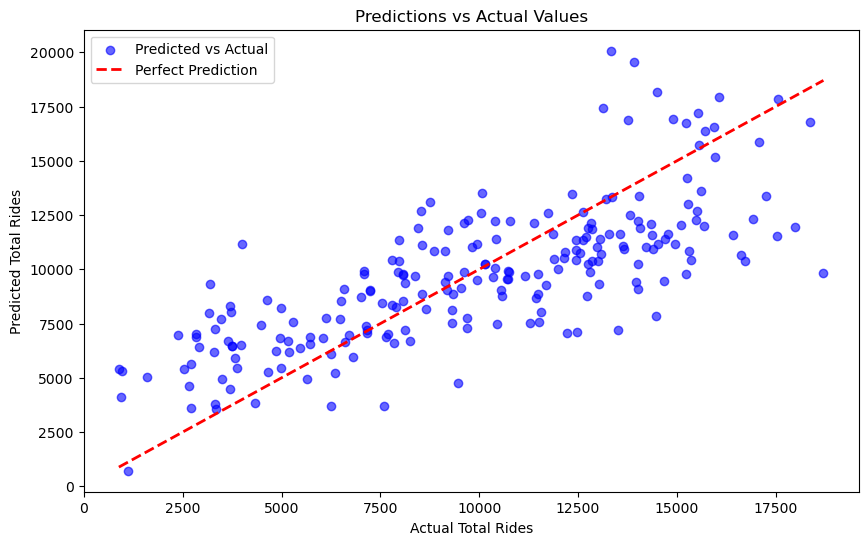

In [115]:
import matplotlib.pyplot as plt

# Generate predictions using scaled test data
y_pred = reg_multi.predict(multivariate_test_scaled)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(total_rides_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')

# Plot the perfect prediction line
plt.plot([total_rides_test.min(), total_rides_test.max()],
         [total_rides_test.min(), total_rides_test.max()], 
         'r--', lw=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Total Rides')
plt.ylabel('Predicted Total Rides')
plt.title('Predictions vs Actual Values')
plt.legend()

# Show plot
plt.show()


Random Forest Regressor 

In [121]:
## Random forrest regressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Features (x) and target (y) variables
x = daily_w.drop(['Total_rides', 'Date', 'holiday_status', 'season', 'Member', 'Casual', 'day_of_week', 'weathercode (wmo code)'], axis=1)
y = daily_w['Total_rides']

print(x.shape)

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Using RandomForestRegressor for regression task
forest = RandomForestRegressor(n_estimators=10, criterion='squared_error', random_state=0)
forest.fit(x_train, y_train)

# You can then use the model to make predictions
y_pred = forest.predict(x_test)

# To evaluate your model, you can use metrics like Mean Absolute Error, Mean Squared Error, etc.
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

train_score = reg_multi_01.score(multivariate_01_train_scaled, total_rides_train)
test_score = reg_multi_01.score(multivariate_01_test_scaled, total_rides_test)
print("Training accuracy:", train_score)
print("Test accuracy:", test_score)


(1095, 3)
Mean Absolute Error: 2419.5726027397263
Mean Squared Error: 9373736.181643836
Training accuracy: 0.5713435711902664
Test accuracy: 0.5878788077200219


In [120]:

# Define the multivariate features and the target
multivariate = daily_w.drop(['Total_rides', 'Date', 'holiday_status', 'season', 'Member', 'Casual', 'day_of_week'], axis=1)
total_rides = daily_w["Total_rides"]

total_rides = total_rides.values.reshape(-1, 1)

print(multivariate.shape)  # Check the shape of the feature set

# Split the data into training and test sets
multivariate_01_train, multivariate_01_test, total_rides_train, total_rides_test = train_test_split(multivariate, total_rides, test_size=0.2, random_state=10)

# Check for shape consistency
print(multivariate_01_train.shape, total_rides_train.shape)

# Scale the data
scaler = StandardScaler()
multivariate_01_train_scaled = scaler.fit_transform(multivariate_01_train)
multivariate_01_test_scaled = scaler.transform(multivariate_01_test)

# Fit the linear regression model
reg_multi_01 = LinearRegression()
reg_multi_01.fit(multivariate_01_train_scaled, total_rides_train)

# Optionally, check model performance
train_score = reg_multi_01.score(multivariate_01_train_scaled, total_rides_train)
test_score = reg_multi_01.score(multivariate_01_test_scaled, total_rides_test)
print("Training accuracy:", train_score)
print("Test accuracy:", test_score)

(1095, 4)
(876, 4) (876, 1)
Training accuracy: 0.5713435711902664
Test accuracy: 0.5878788077200219


# ML model for hourly data

In [122]:
hr_w.head(2)

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),holiday_status,season
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,holiday,winter
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,holiday,winter


In [123]:
hr_w.isna().sum()

Casual                     11
Date                        0
Hour                        0
Member                     11
Total_rides                11
relativehumidity_2m (%)     0
temperature_2m (°C)         0
weathercode (wmo code)      0
windspeed_10m (km/h)        0
holiday_status              0
season                      0
dtype: int64

In [124]:
# getting rid of NaNs
hr_w['Casual'] = hr_w['Casual'].fillna(method='ffill')
hr_w['Member'] = hr_w['Member'].fillna(method='ffill')
hr_w['Total_rides'] = hr_w['Total_rides'].fillna(method='ffill')

/var/folders/b3/c7kkv0f50sj621z2tvwq2xqh0000gn/T/ipykernel_88664/3952360159.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hr_w['Casual'] = hr_w['Casual'].fillna(method='ffill')
/var/folders/b3/c7kkv0f50sj621z2tvwq2xqh0000gn/T/ipykernel_88664/3952360159.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hr_w['Member'] = hr_w['Member'].fillna(method='ffill')
/var/folders/b3/c7kkv0f50sj621z2tvwq2xqh0000gn/T/ipykernel_88664/3952360159.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hr_w['Total_rides'] = hr_w['Total_rides'].fillna(method='ffill')


In [ ]:
#Filter out non-numeric columns
numeric_columns = hr_w.select_dtypes(include=['number'])

#Calculate the correlations with the target variable for remaining numeric columns
correlation_matrix = numeric_columns.corr()
correlation_with_target = correlation_matrix['Total_rides']

# Sort the correlations in descending order to find the strongest positive and negative correlations
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

# The top feature with the highest positive correlation
top_correlation_feature = sorted_correlation.index[1:11]  # Index 0 is the target variable itself


# Print the results
print(f"Top correlation feature: {top_correlation_feature}")

Top correlation feature: Index(['Member', 'Casual', 'Hour', 'temperature_2m (°C)',
       'relativehumidity_2m (%)', 'weathercode (wmo code)',
       'windspeed_10m (km/h)'],
      dtype='object')


In [127]:
hr_corr = hr_w[['Member', 'Casual', 'Hour', 'temperature_2m (°C)',
       'relativehumidity_2m (%)', 'weathercode (wmo code)',
       'windspeed_10m (km/h)']]

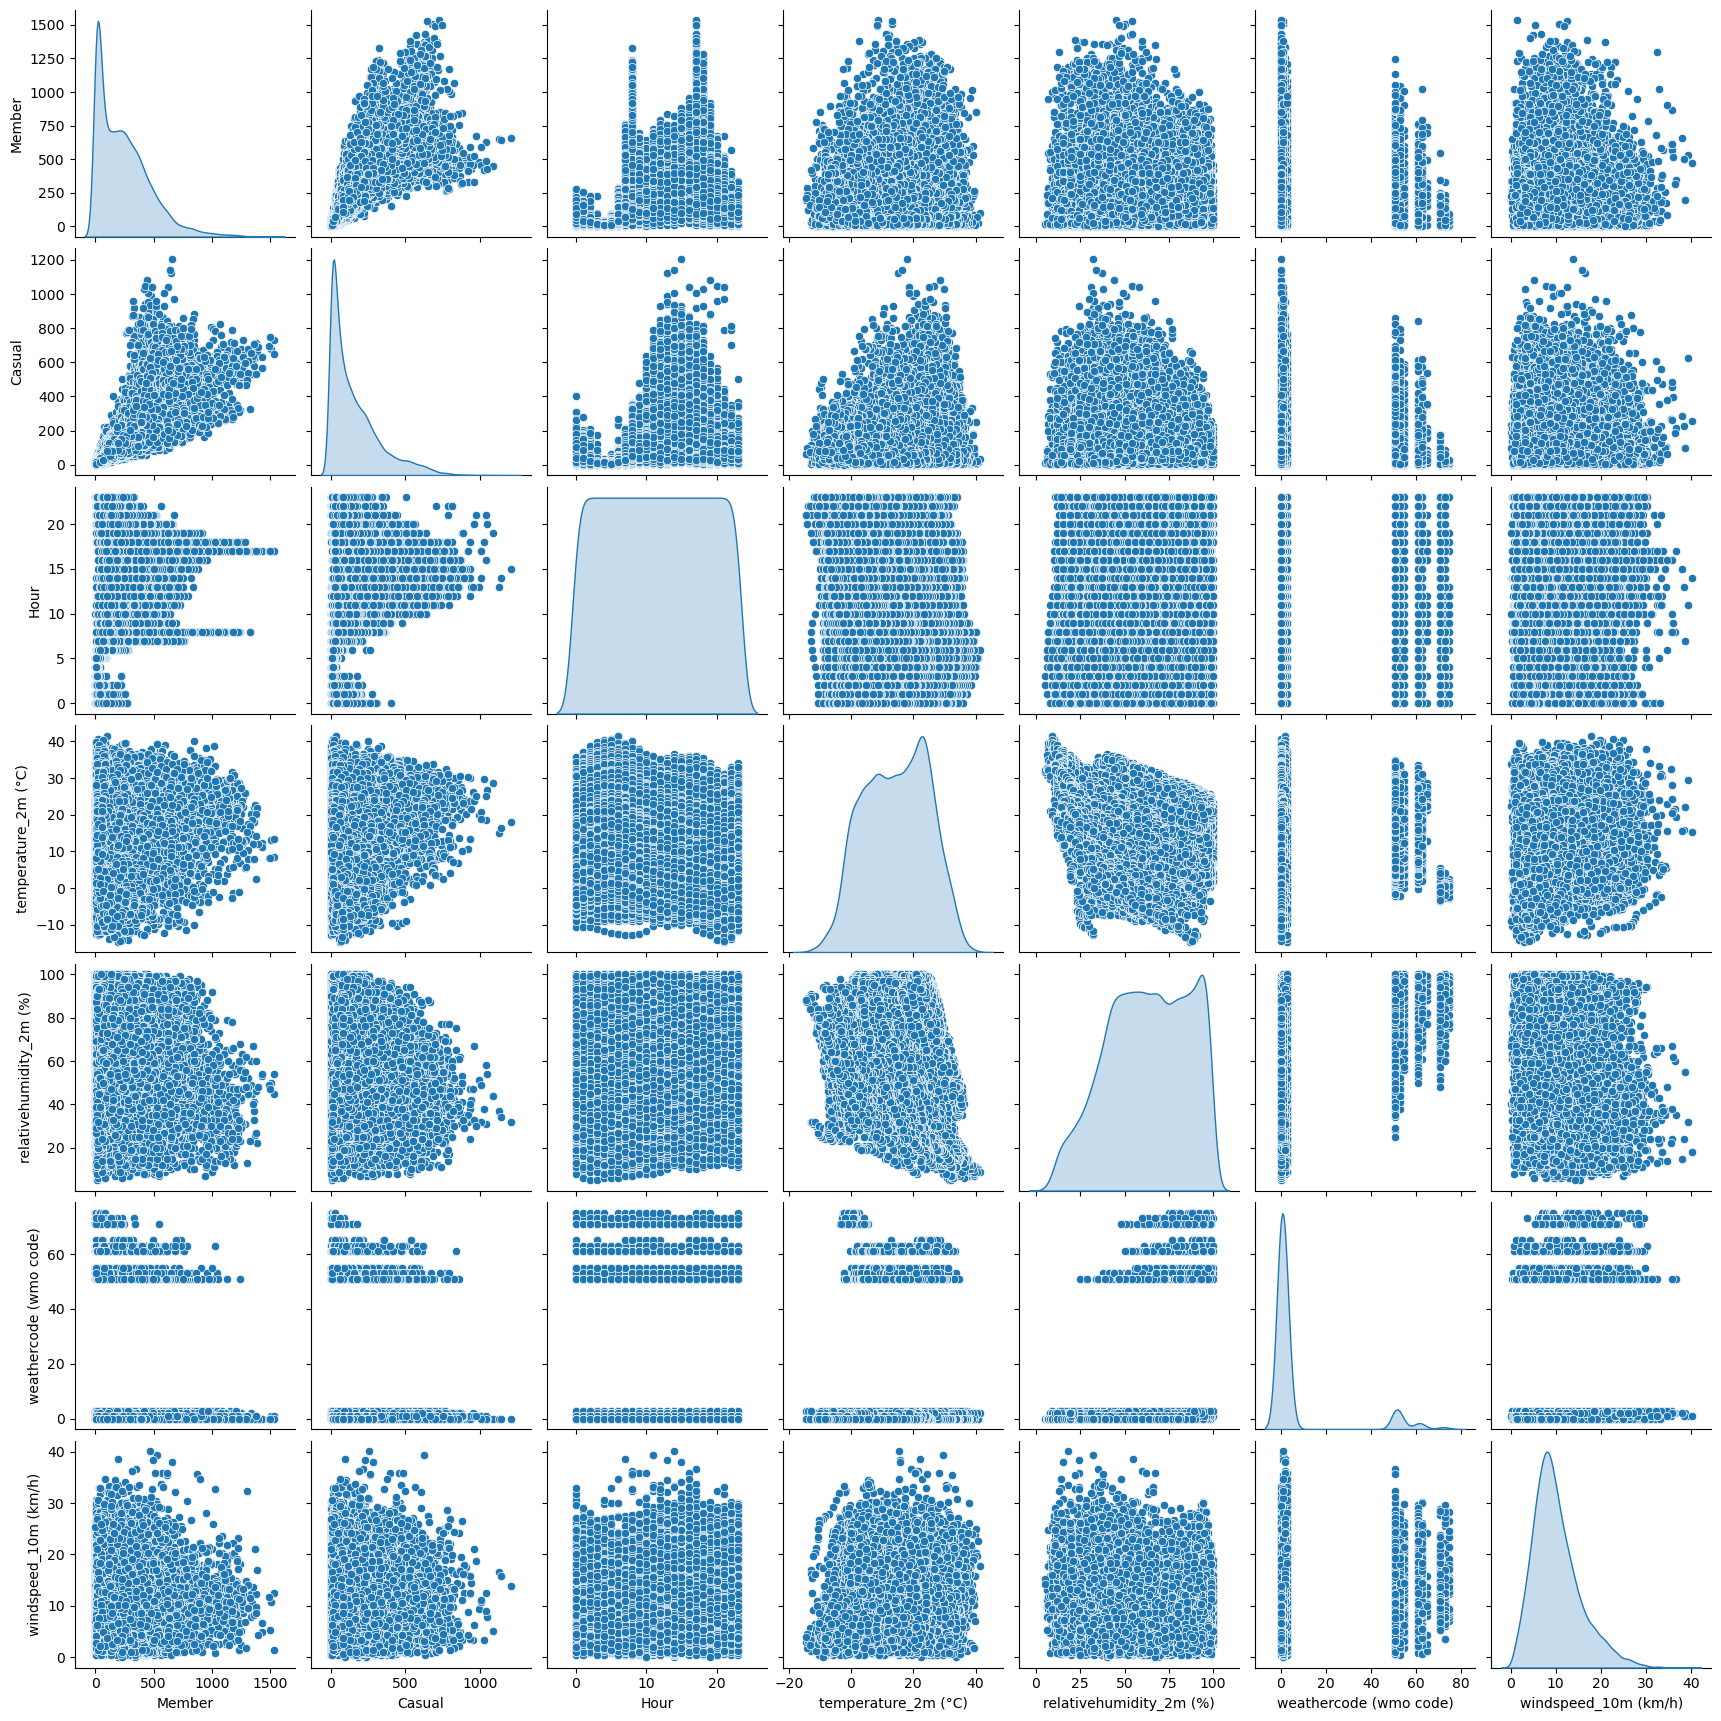

In [ ]:
sns.pairplot(hr_corr, diag_kind='kde')
plt.show()

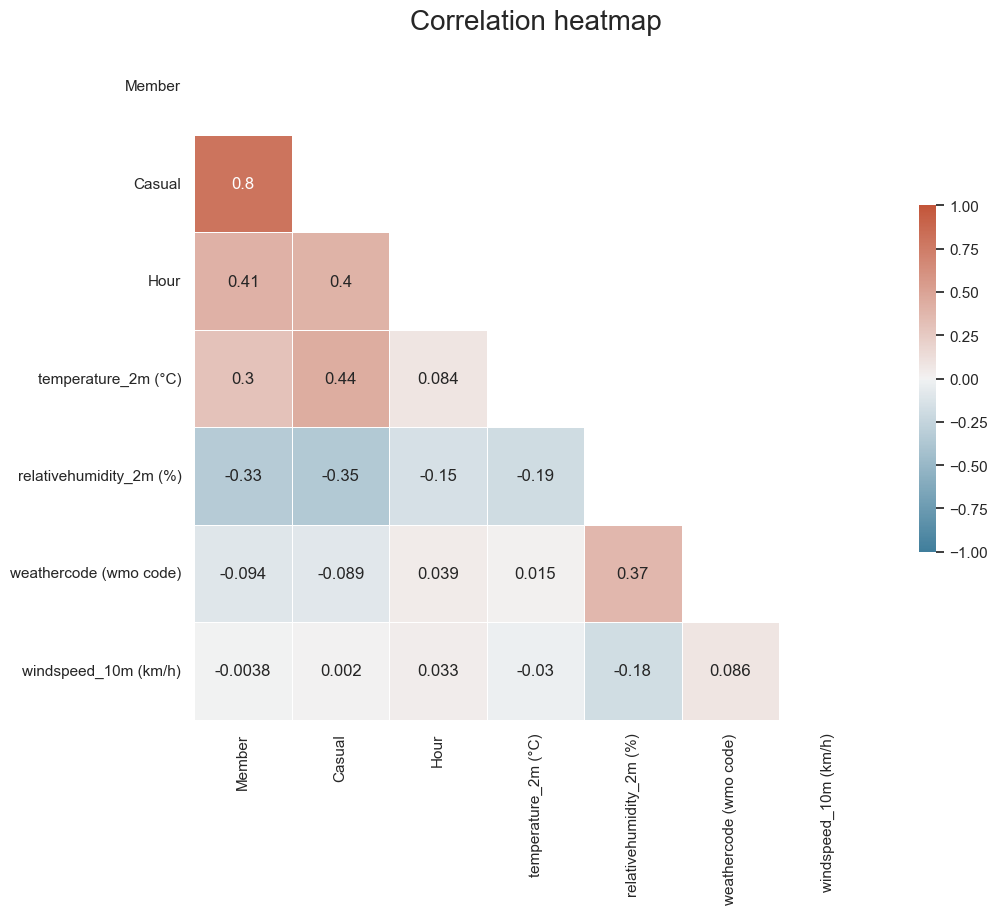

In [135]:
# Creating correlation matrix in orded to see correlations in hourly data set
sns.set_theme(style="white")

# Compute the correlation matrix
corr = hr_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin = -1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

plt.title('Correlation heatmap', fontsize=20)
plt.show()

In [125]:
x = hr_w[['Member', 'Casual', 'Hour', 'temperature_2m (°C)', 'relativehumidity_2m (%)', 'weathercode (wmo code)', 'windspeed_10m (km/h)']]
y = hr_w['Total_rides']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

mlin_df = LinearRegression()
mlin_df = mlin_df.fit(x_train, y_train)
mlin_df.intercept_ # constant b0
mlin_df.coef_  # variable coefficient

array([ 1.00000000e+00,  1.00000000e+00,  8.89670167e-16,  5.32866171e-16,
        4.15545002e-16, -2.89072933e-15, -2.52873715e-15])

In [ ]:
hr_corr.iloc[0,:]

Member                     26.0
Casual                     20.0
Hour                        0.0
temperature_2m (°C)         2.4
relativehumidity_2m (%)    90.0
weathercode (wmo code)      1.0
windspeed_10m (km/h)       10.2
Name: 0, dtype: float64

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


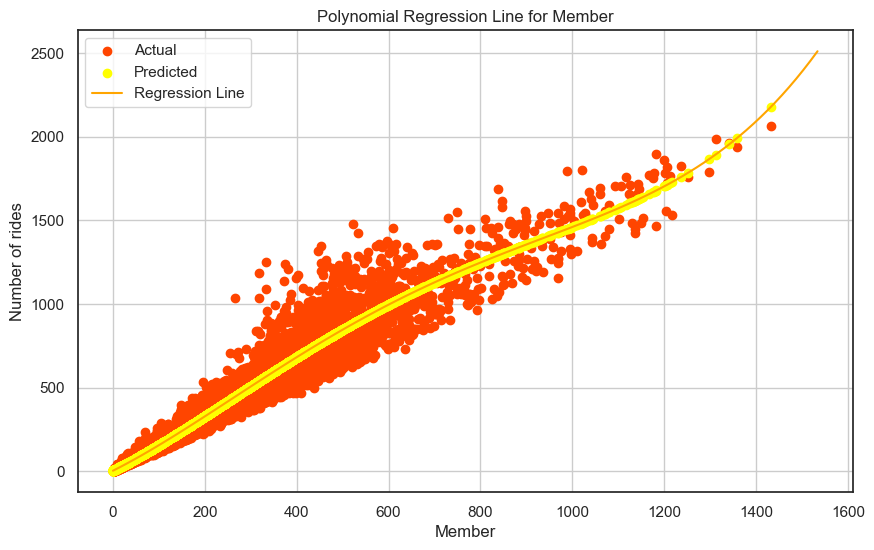

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


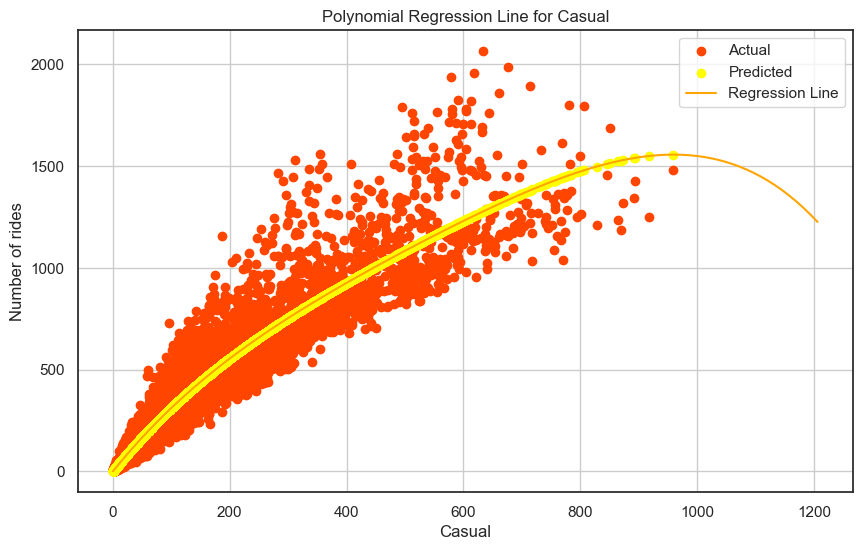

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


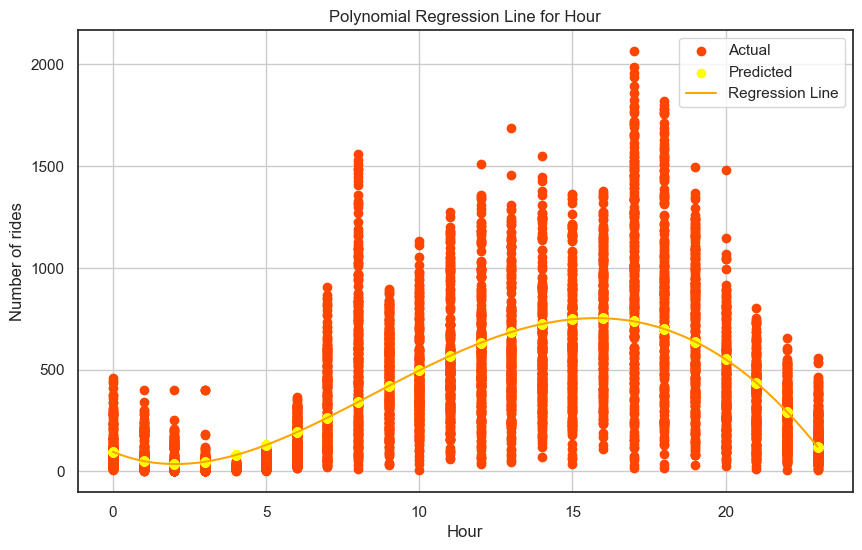

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


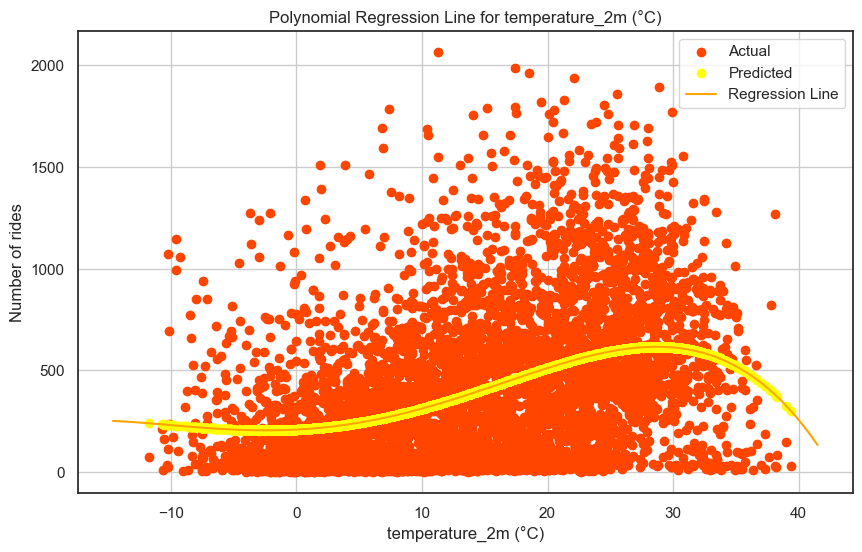

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


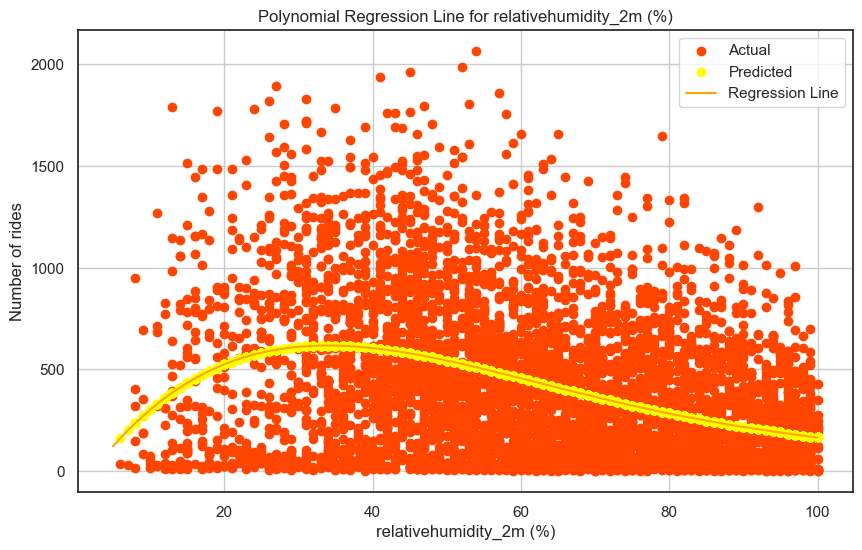

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


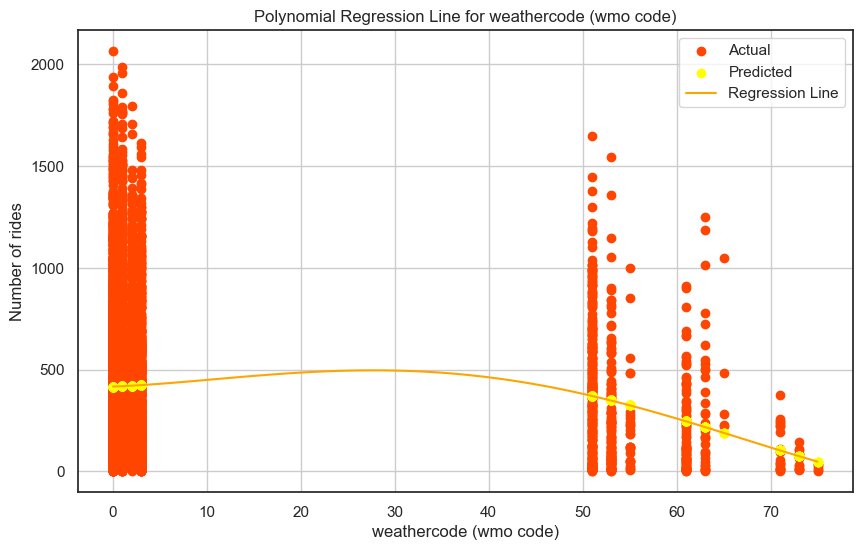

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


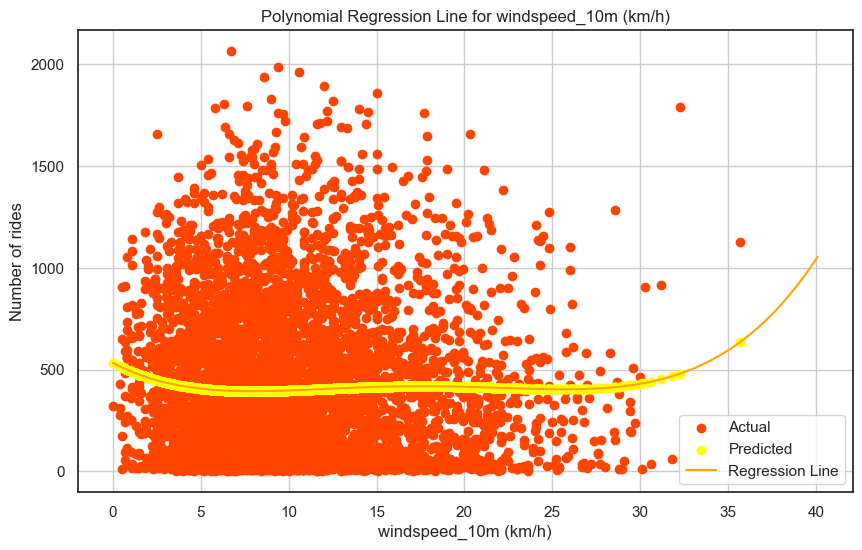

In [138]:
# # Polynomial regression
# Extract predictors and target variable
X = hr_w[['Member', 'Casual', 'Hour', 'temperature_2m (°C)', 'relativehumidity_2m (%)', 'weathercode (wmo code)', 'windspeed_10m (km/h)']]
y = hr_w['Total_rides']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose the degree of the polynomial regression
degree = 4

# Iterate through each independent variable for visualization
for independent_variable in X.columns:
    # Fit polynomial regression model for the current independent variable
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train[[independent_variable]])
    X_test_poly = poly.transform(X_test[[independent_variable]])
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions on the test set for the current independent variable
    y_pred = model.predict(X_test_poly)

    plt.figure(figsize=(10, 6))

    # Create a scatter plot of actual vs. predicted values for the current independent variable
    plt.scatter(X_test[independent_variable], y_test, label='Actual', color='orangered')
    plt.scatter(X_test[independent_variable], y_pred, label='Predicted', color='yellow')

    # Generate values for the current independent variable to plot the polynomial regression line
    x_range = np.linspace(X[independent_variable].min(), X[independent_variable].max(), 100)
    x_range_poly = poly.transform(x_range.reshape(-1, 1))
    y_range_pred = model.predict(x_range_poly)

    plt.plot(x_range, y_range_pred, label='Regression Line', color='orange')
    plt.xlabel(independent_variable)
    plt.ylabel("Number of rides")
    plt.legend()
    plt.title("Polynomial Regression Line for " + independent_variable)
    plt.grid(True)

    plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(x_range, y_range_pred))
r2 = r2_score(x_range, y_range_pred)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 4.1e+02
R2 Score for Test set: -1.2e+03


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_df = PolynomialFeatures(degree = 3)
transform_poly = poly_df.fit_transform(x_train)

linreg2 = LinearRegression()
linreg2.fit(transform_poly,y_train)

polynomial_predict = linreg2.predict(transform_poly)

RMSE Score for Test set: 4.8e+02
R2 Score for Test set: -1.7e+03


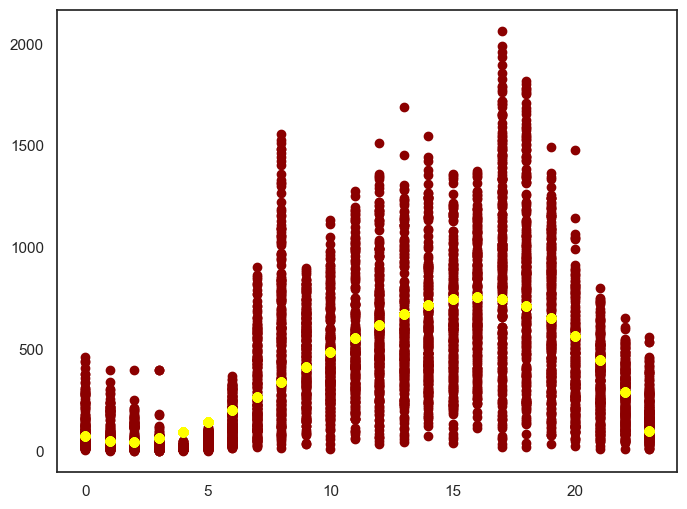

In [140]:
# Polynomial regression to predict total rides depending on hour
X = hr_w[['Hour']]
y = hr_w['Total_rides']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose the degree of the polynomial regression
degree = 3

poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)
# Predictions on the test set for the current independent variable
y_pred = model.predict(X_test_poly)
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual', color='darkred')
plt.scatter(X_test, y_pred, label='Predicted', color='yellow')
rmse = np.sqrt(mean_squared_error(x_range, y_range_pred))
r2 = r2_score(x_range, y_range_pred)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

(1095, 4)
(876, 4) (876,)
Training R² score: 0.5713435711902664
Test R² score: 0.5878788077200219
Training Mean Squared Error: 7138704.231360888
Test Mean Squared Error: 7647051.446370661


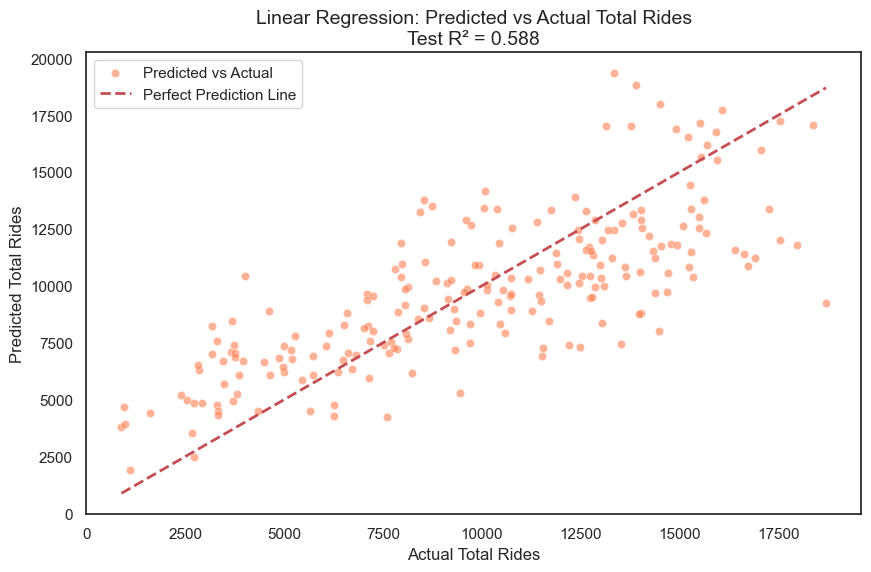


Sample input:
Windspeed: 10
Weather code: 15
Apparent temperature: 5
Humidity: 60

Predicted number of rides: 5699.0780618187255


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [144]:
from sklearn.metrics import mean_squared_error, r2_score

# Define the multivariate features and target
multivariate = daily_w.drop(['Total_rides', 'Date', 'holiday_status', 'season', 'Member', 'Casual', 'day_of_week'], axis=1)
total_rides = daily_w["Total_rides"]

# Check the shape of the feature set
print(multivariate.shape)

# Split the data into training and test sets
multivariate_01_train, multivariate_01_test, total_rides_train, total_rides_test = train_test_split(multivariate, total_rides, test_size=0.2, random_state=10)

# Check for shape consistency
print(multivariate_01_train.shape, total_rides_train.shape)

# Scale the data
scaler = StandardScaler()
multivariate_01_train_scaled = scaler.fit_transform(multivariate_01_train)
multivariate_01_test_scaled = scaler.transform(multivariate_01_test)

# Fit the linear regression model
reg_multi_01 = LinearRegression()
reg_multi_01.fit(multivariate_01_train_scaled, total_rides_train)

# Make predictions on the test set
total_rides_pred = reg_multi_01.predict(multivariate_01_test_scaled)

# Evaluate the model performance
train_r2 = r2_score(total_rides_train, reg_multi_01.predict(multivariate_01_train_scaled))
test_r2 = r2_score(total_rides_test, total_rides_pred)

# Mean Squared Error (MSE) for both train and test sets
train_mse = mean_squared_error(total_rides_train, reg_multi_01.predict(multivariate_01_train_scaled))
test_mse = mean_squared_error(total_rides_test, total_rides_pred)

print(f"Training R² score: {train_r2}")
print(f"Test R² score: {test_r2}")
print(f"Training Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=total_rides_test, y=total_rides_pred, color="coral", alpha=0.6, label="Predicted vs Actual")
plt.plot([total_rides_test.min(), total_rides_test.max()], [total_rides_test.min(), total_rides_test.max()], 'r--', lw=2, label='Perfect Prediction Line')

# Add title and labels with R² score
plt.title(f"Linear Regression: Predicted vs Actual Total Rides\nTest R² = {test_r2:.3f}", fontsize=14)
plt.xlabel("Actual Total Rides", fontsize=12)
plt.ylabel("Predicted Total Rides", fontsize=12)
plt.legend()
plt.show()

# Sample prediction
predictions = [10, 15, 5, 60]  # Example input values, ensure they match the number of features

# Reshape the input for prediction
predictions = np.array(predictions).reshape(1, -1)

# Scale the input using the fitted scaler
predictions_scaled = scaler.transform(predictions)

# Make the prediction
pred_3 = reg_multi_01.predict(predictions_scaled)

# Output the results
print(f"\nSample input:"
      f"\nWindspeed: {predictions[0][0]}"
      f"\nWeather code: {predictions[0][1]}"
      f"\nApparent temperature: {predictions[0][2]}"
      f"\nHumidity: {predictions[0][3]}"  # Adjust based on the actual feature names
      f"\n\nPredicted number of rides: {pred_3[0]}")
